# Избор на податочно множество за деменција и негова анализа преку соодветна методологија

In [700]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import plotly.express as px
import numpy as np
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

# Справување со missing вредности во датасетот

In [703]:
data=pd.read_csv(r"C:\Users\Ane\Downloads\dementia_dataset (1).csv")
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


### Проверка на повторувачки вредности

In [706]:
duplicates = data.duplicated()
print(f'Вкупно дупликати: {duplicates.sum()}')

Вкупно дупликати: 0


### Пресметка на процент на missing вредности 

In [709]:
missing_values = data.isnull().sum()
percent_missing = (missing_values / len(data)) * 100

display(HTML('<h2 style="color: blue;">Missing вредности</h2>'))
print(missing_values)
display(HTML('<h3 style="color: red;">Процент на missing вредности</h3>'))
print(percent_missing)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


Subject ID    0.000000
MRI ID        0.000000
Group         0.000000
Visit         0.000000
MR Delay      0.000000
M/F           0.000000
Hand          0.000000
Age           0.000000
EDUC          0.000000
SES           5.093834
MMSE          0.536193
CDR           0.000000
eTIV          0.000000
nWBV          0.000000
ASF           0.000000
dtype: float64


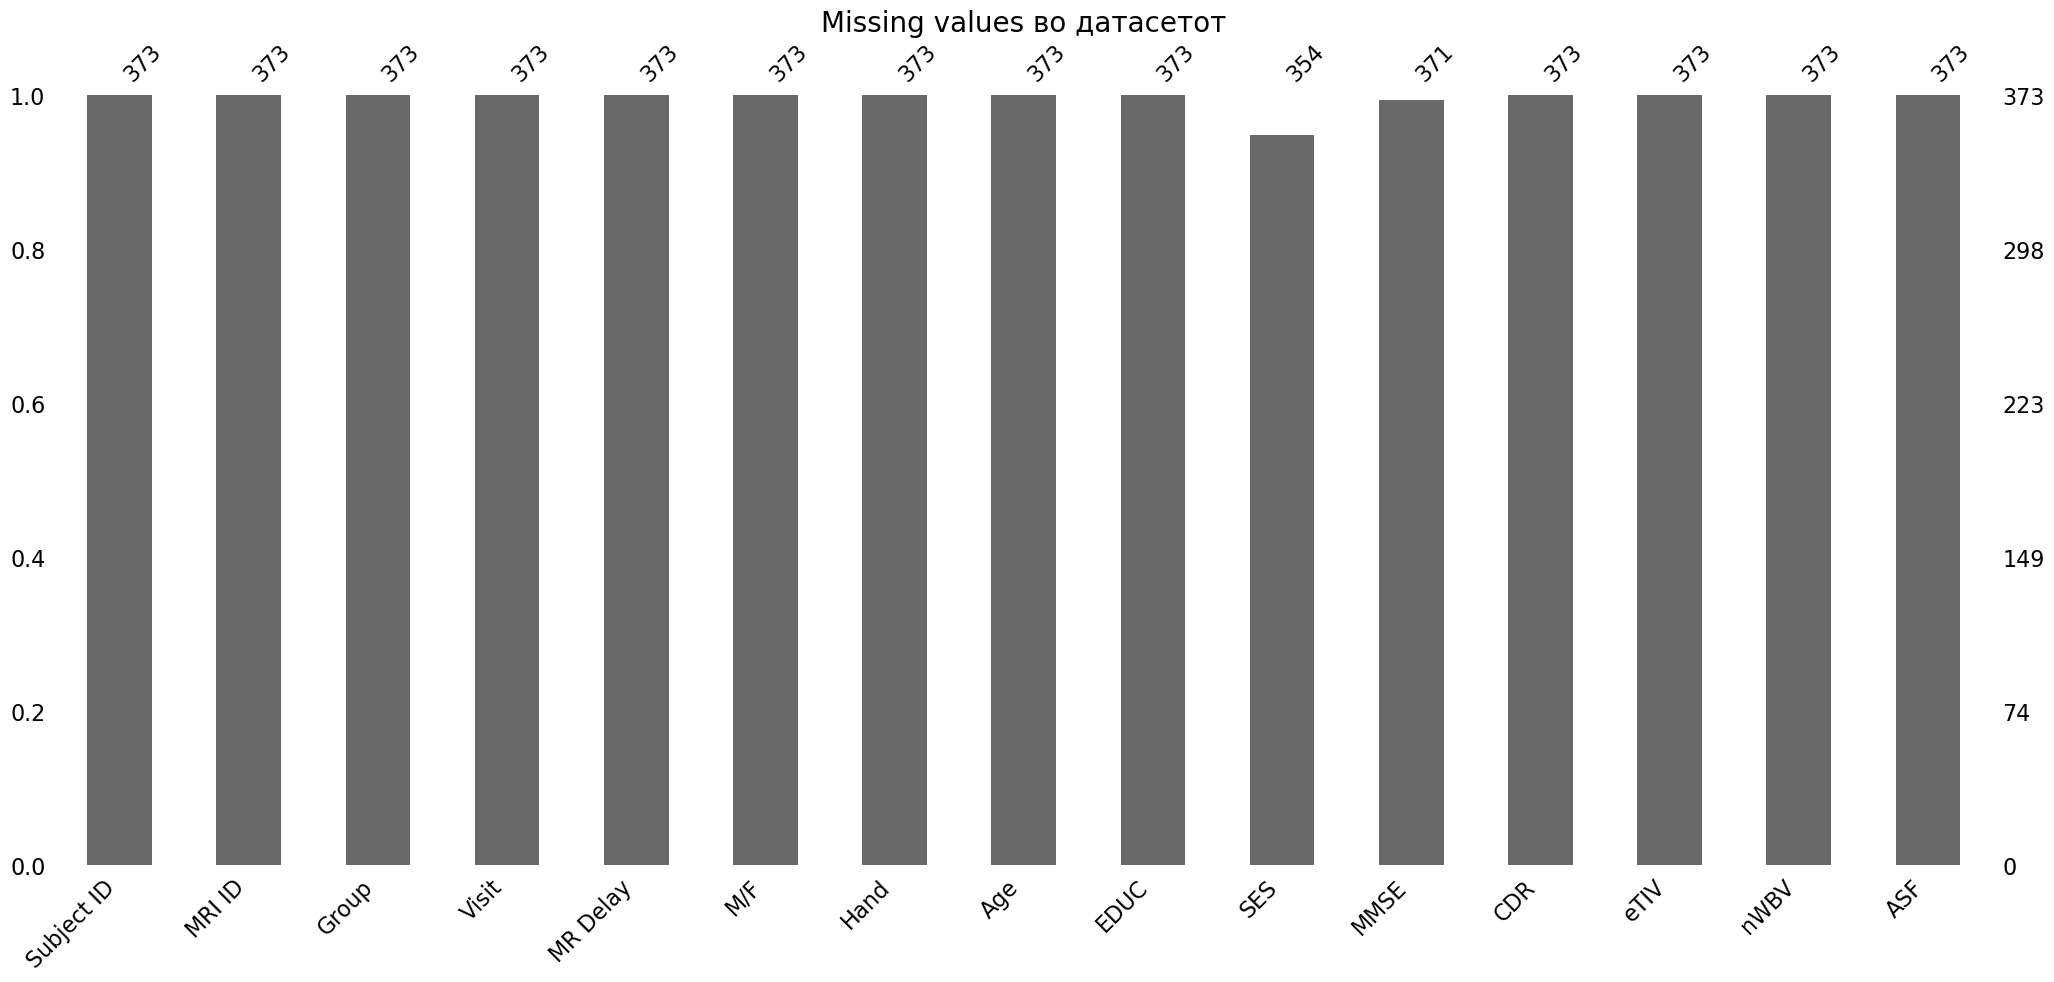

In [711]:
msno.bar(data)
plt.title('Missing values во датасетот', fontsize=20)
plt.show()

In [712]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


### Проверка на дистрибуцијата на MMSE маркерот

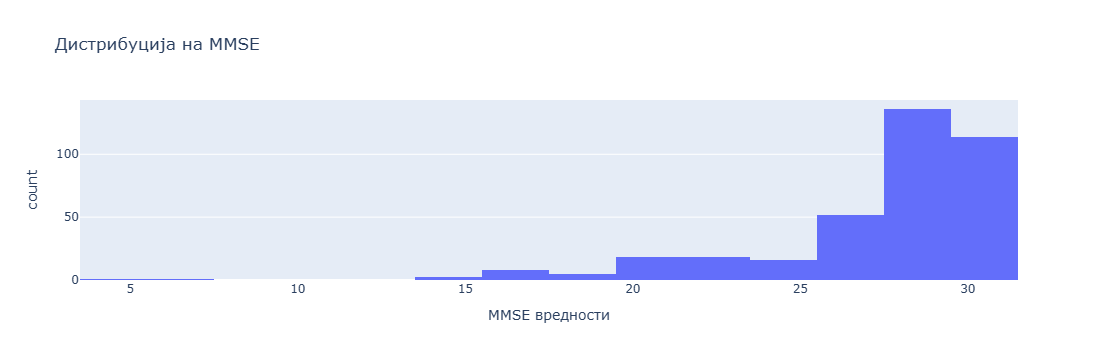

In [714]:
hist = px.histogram(data, x='MMSE', nbins=20, title='Дистрибуција на MMSE', labels={'MMSE': 'MMSE вредности'})
hist.show()

### Соодветно справување со missing вредности 

In [716]:
data['SES'] = data['SES'].fillna(data['SES'].median())
data = data.dropna(axis=0, subset=['MMSE'])

# Визуелизација на датасетот

### Анализа на дистрибциии на биомаркери по групи според возраст

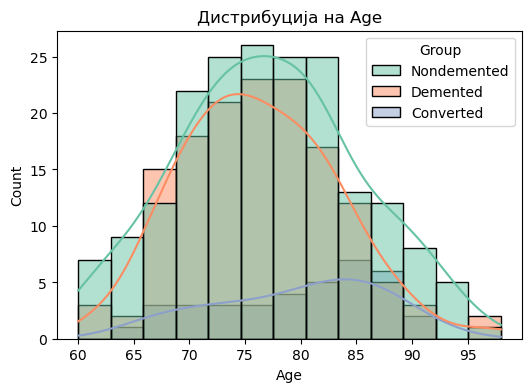

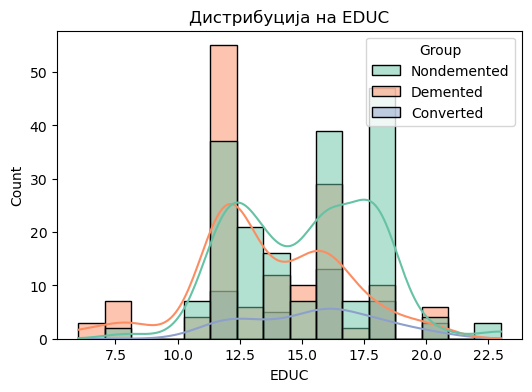

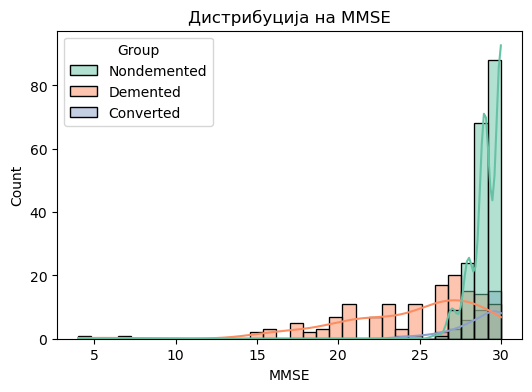

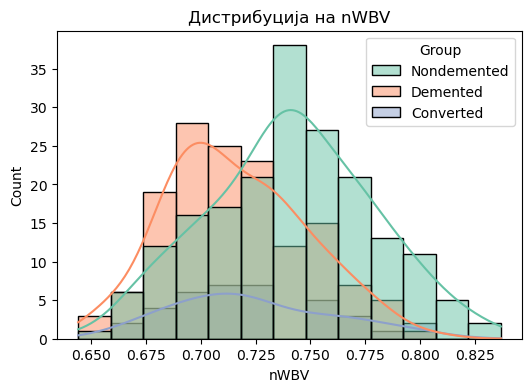

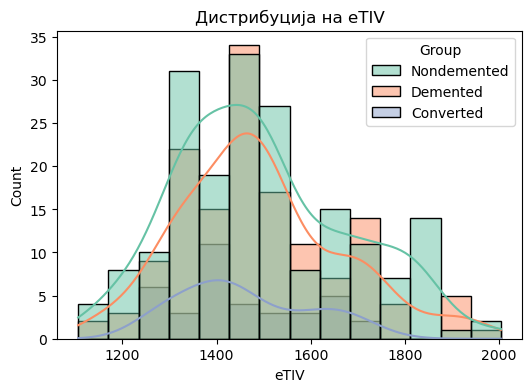

In [719]:
features = ['Age', 'EDUC', 'MMSE', 'nWBV', 'eTIV']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=col, hue='Group', kde=True, palette='Set2')
    plt.title(f'Дистрибуција на {col}')
    plt.show()

### Визуелно претставувње на дистрибуциите по групи

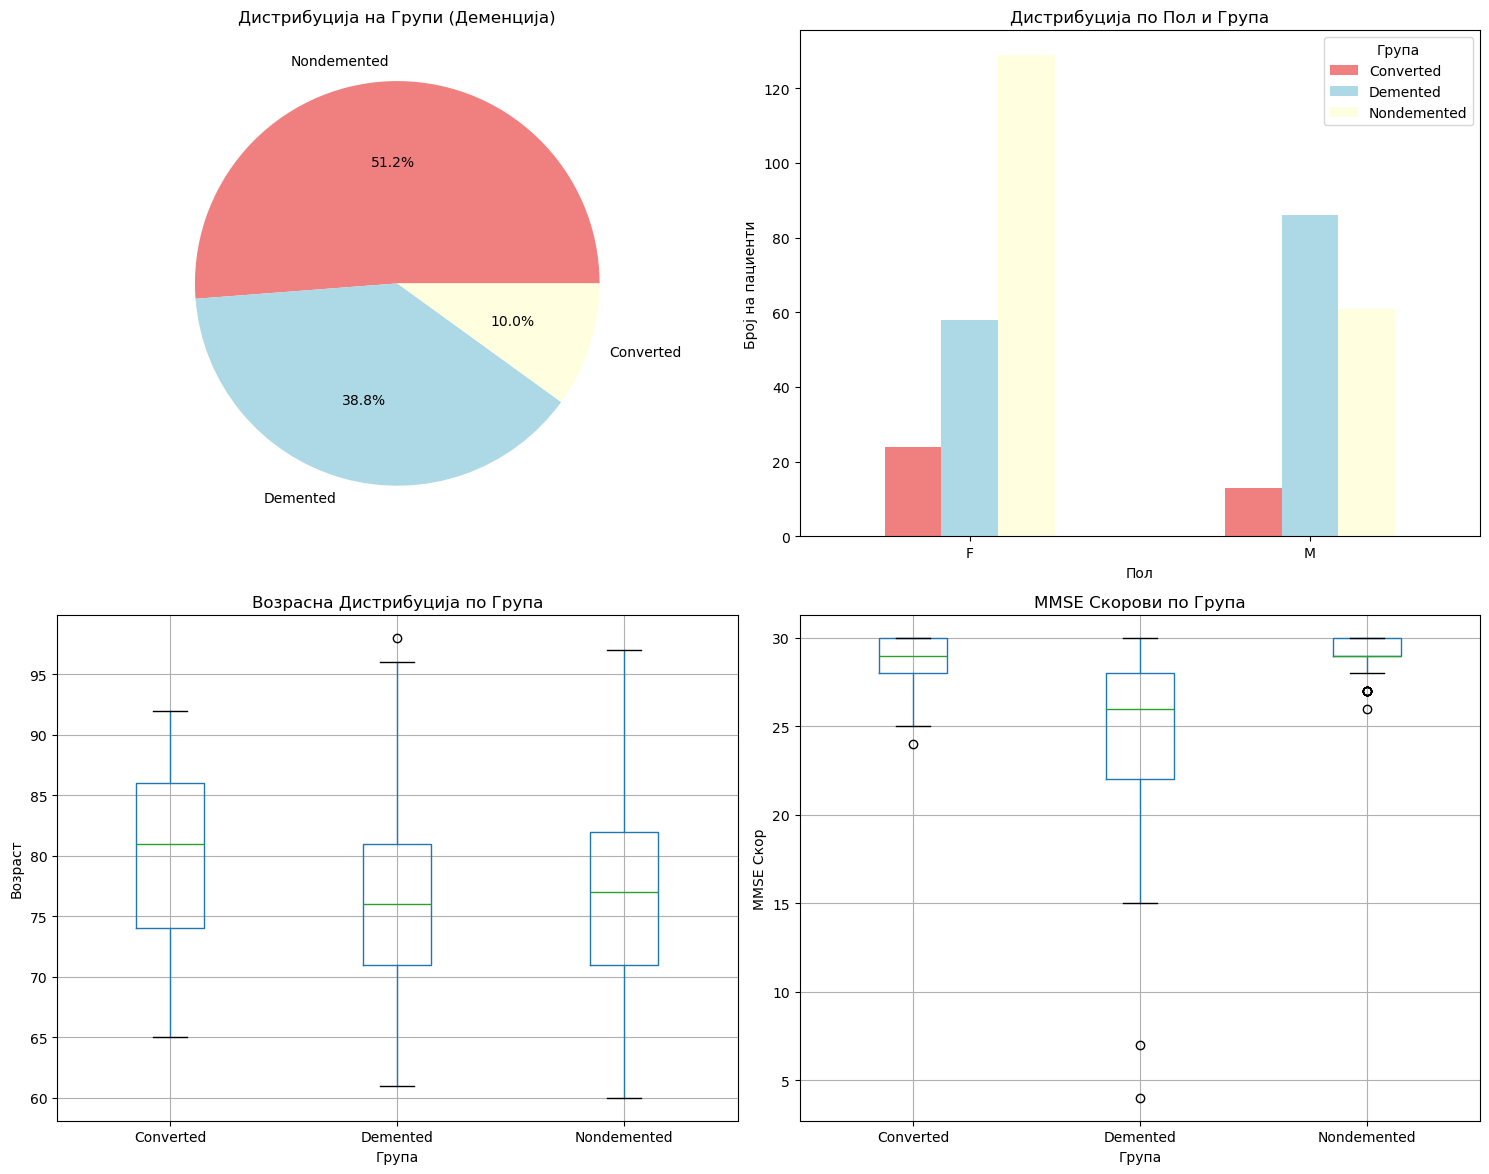

In [723]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
data['Group'].value_counts().plot.pie(
    ax=axes[0,0], autopct='%1.1f%%',
    colors=['lightcoral', 'lightblue', 'lightyellow'],
    labels=data['Group'].value_counts().index
)
axes[0,0].set_title('Дистрибуција на Групи (Деменција)')
axes[0,0].set_ylabel('') 

pd.crosstab(data['M/F'], data['Group']).plot.bar(
    ax=axes[0,1], color=['lightcoral', 'lightblue', 'lightyellow']
)
axes[0,1].set(title='Дистрибуција по Пол и Група', xlabel='Пол', ylabel='Број на пациенти')
axes[0,1].legend(title='Група')
axes[0,1].tick_params(axis='x', rotation=0)

data.boxplot(column='Age', by='Group', ax=axes[1,0])
axes[1,0].set(title='Возрасна Дистрибуција по Група', xlabel='Група', ylabel='Возраст')

data.boxplot(column='MMSE', by='Group', ax=axes[1,1])
axes[1,1].set(title='MMSE Скорови по Група', xlabel='Група', ylabel='MMSE Скор')

plt.suptitle('')  
plt.tight_layout()
plt.show()

In [726]:
print(data['Age'].describe())

count    371.000000
mean      77.018868
std        7.660864
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: Age, dtype: float64


### Групирање на податоците по  возрасни групи и графичко прикажување на трендовите за статусот на деменција

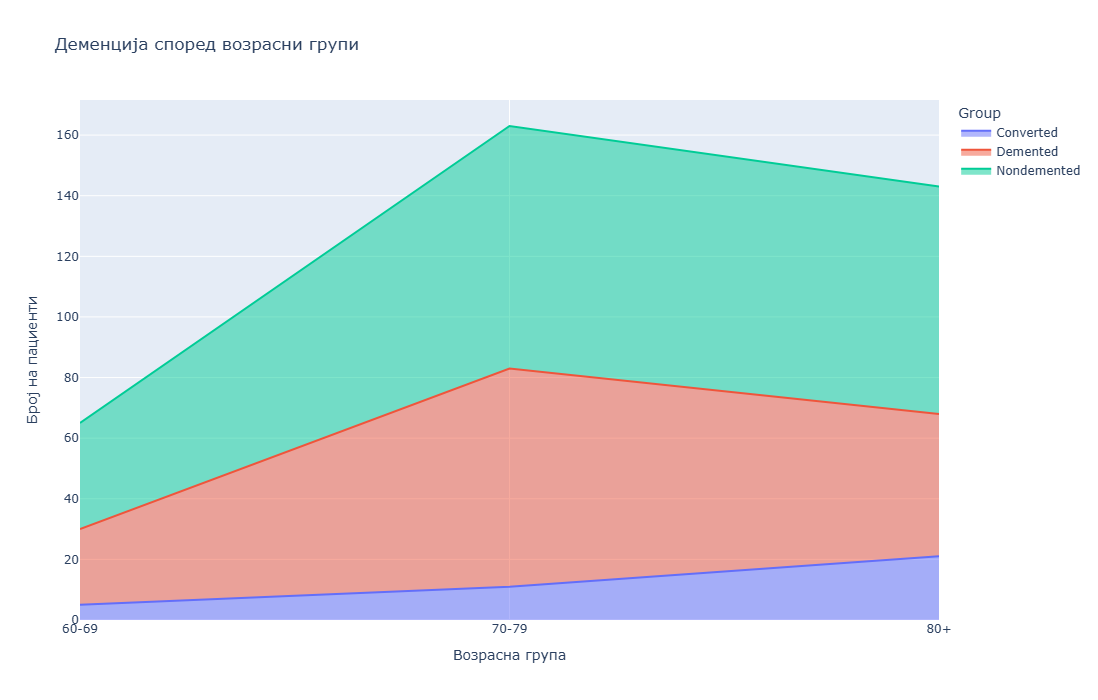

In [728]:
data = data.copy()
def create_age_groups(age):
    if age < 60:
        return '<60'
    elif age < 70:
        return '60-69'
    elif age < 80:
        return '70-79'
    else:
        return '80+'

data['age_group'] = data['Age'].apply(create_age_groups)

grouped = data.groupby(['age_group', 'Group']).size().reset_index(name='count').copy()

import pandas as pd
import plotly.express as px

age_categories = ['<60', '60-69', '70-79', '80+']
grouped['age_group'] = pd.Categorical(grouped['age_group'], categories=age_categories, ordered=True)
grouped = grouped.sort_values('age_group')

fig = px.area(
    grouped,
    x='age_group',       
    y='count',          
    color='Group',       
    labels={
        'age_group': 'Возрасна група',
        'count': 'Број на пациенти'
    },
    title='Деменција според возрасни групи',
    width=800,
    height=700
)

fig.show()

### Визуелизација на корелациите на нумеричките вредности преку матрица

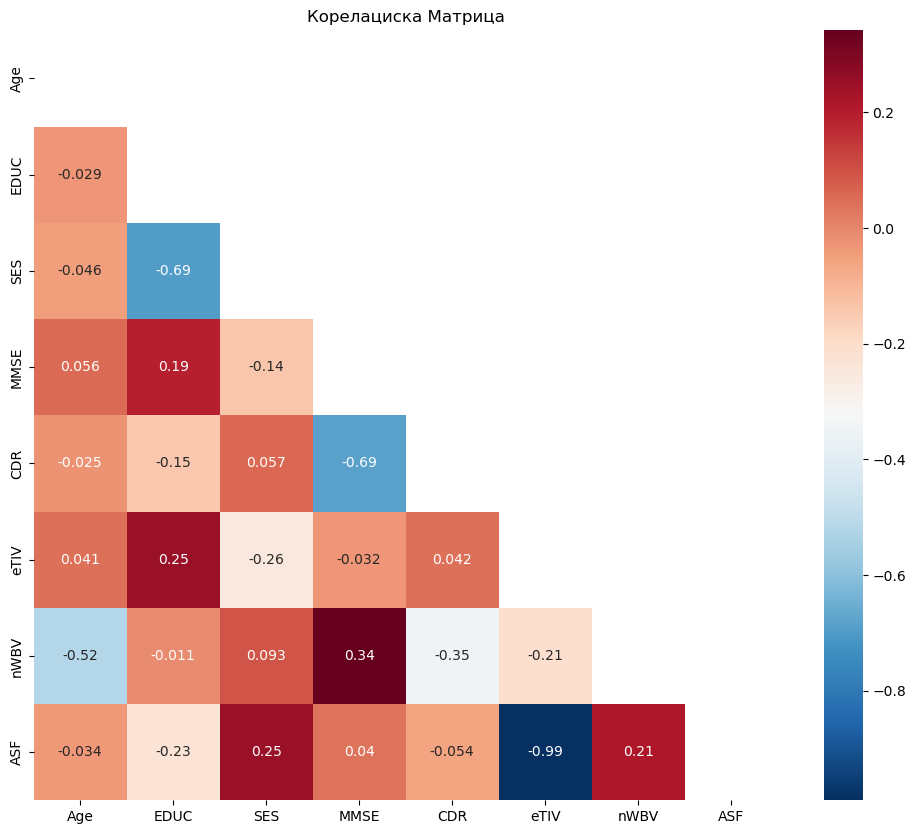

In [730]:
numeric_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
corr = data[numeric_cols].corr()
mask = np.triu(np.ones(corr.shape))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='RdBu_r', mask=mask)
plt.title('Корелациска Матрица')
plt.show()

## Проверка за балансираност на датасетот

In [732]:
print(data['Group'].value_counts(normalize=True) * 100)

Group
Nondemented    51.212938
Demented       38.814016
Converted       9.973046
Name: proportion, dtype: float64


## Енкодирање на датасетот

In [734]:
data.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
age_group      object
dtype: object

In [735]:
binary_columns=data[['M/F','Hand','Group']]

In [736]:
encoder=LabelEncoder()
for column in binary_columns:
    data[column]=encoder.fit_transform(data[column])

In [737]:
data=data.drop(columns=['age_group'])

In [738]:
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,2,1,0,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,2,2,763,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


### Корелациска матрица на биомаркери со статусот на деменција

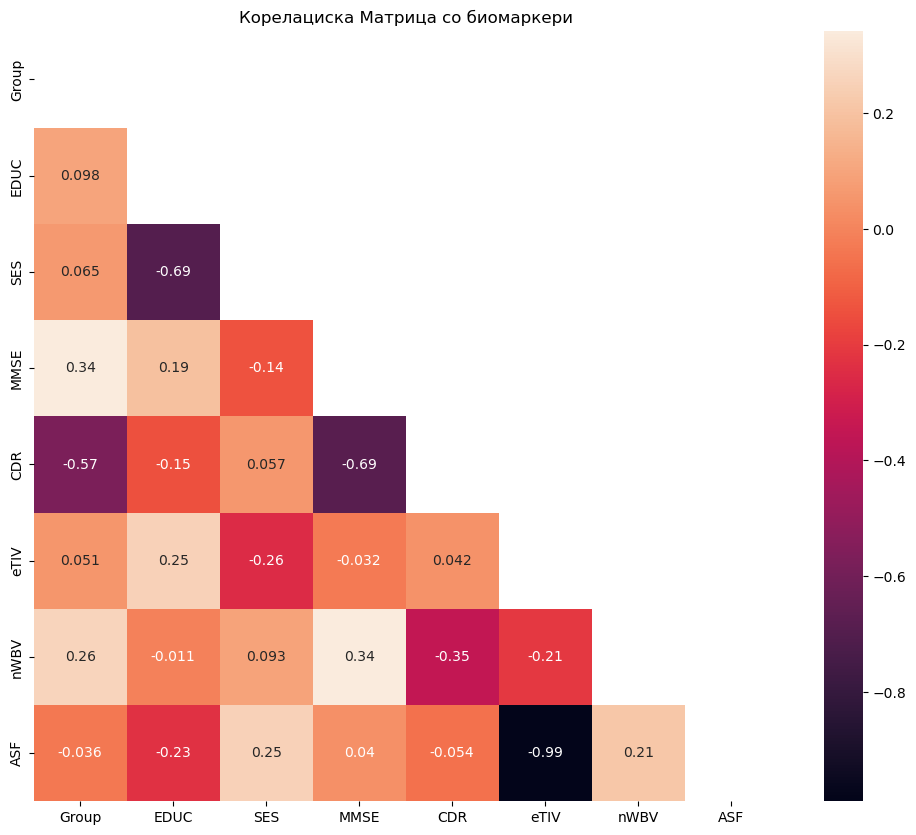

In [740]:
numeric_cols = ['Group', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
corr = data[numeric_cols].corr()
mask = np.triu(np.ones(corr.shape))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Корелациска Матрица со биомаркери')
plt.show()

# Креирање на 4 различни модели

## Поделба на тренирачкии и тестирачки сетови

In [744]:
X = data.drop(columns=['Group', 'Subject ID', 'MRI ID', 'MR Delay', 'SES'])
Y=data.Group
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True )

## Стандардизација на датасетот

In [746]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## RandomForestClassifier

In [749]:
rf = RandomForestClassifier(
    n_estimators=100,  
    max_depth=8,            
    min_samples_split=5,      
    min_samples_leaf=2,      
    max_features='sqrt',     
    class_weight='balanced',  
    random_state=42
)

In [751]:
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

In [753]:
report = classification_report(Y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.97      1.00      0.99        34
           2       0.87      1.00      0.93        34

    accuracy                           0.92        75
   macro avg       0.95      0.71      0.72        75
weighted avg       0.93      0.92      0.89        75



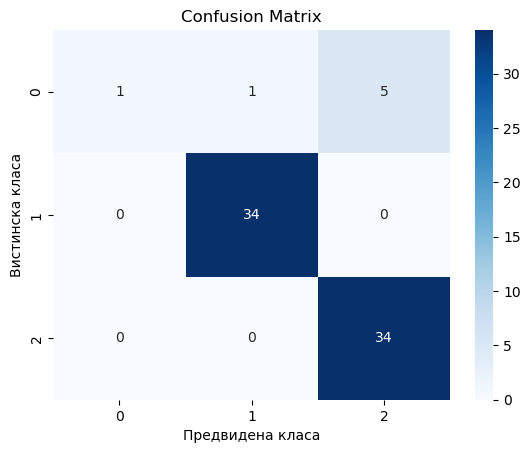

In [754]:
cm = confusion_matrix(Y_test, y_pred_rf, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)

plt.xlabel('Предвидена класа')
plt.ylabel('Вистинска класа')
plt.title('Confusion Matrix')
plt.show()


## LogisticRegression

In [763]:
lr = LogisticRegression(
    penalty='l2',           
    C=1.0,                 
    solver='lbfgs',         
    max_iter=1000,          
    class_weight='balanced',
    random_state=42
)

In [764]:
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [765]:
print(classification_report(Y_test, y_pred_lr, digits=4))

              precision    recall  f1-score   support

           0     0.2000    0.2857    0.2353         7
           1     0.9667    0.8529    0.9062        34
           2     0.8571    0.8824    0.8696        34

    accuracy                         0.8133        75
   macro avg     0.6746    0.6737    0.6704        75
weighted avg     0.8455    0.8133    0.8270        75



## KNeighborsClassifier

In [769]:
knn = KNeighborsClassifier(
    n_neighbors=7,          
    weights='distance',     
    algorithm='auto',       
    leaf_size=30,           
    p=2                    
)

In [772]:
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

In [773]:
print(classification_report(Y_test, y_pred_knn, digits=4))

              precision    recall  f1-score   support

           0     0.2500    0.1429    0.1818         7
           1     0.9355    0.8529    0.8923        34
           2     0.8250    0.9706    0.8919        34

    accuracy                         0.8400        75
   macro avg     0.6702    0.6555    0.6553        75
weighted avg     0.8214    0.8400    0.8258        75



# Neural Network

In [777]:
model = Sequential([
Input((X_train.shape[1],)),
Dense(64, activation='relu'),
Dense(32, activation='relu'),
Dense(3, activation='softmax')
])

In [782]:
model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam', 
                   metrics=['accuracy'])

In [788]:
model_adam.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,947 (11.51 KB)

 Trainable params: 2,947 (11.51 KB)

 Non-trainable params: 0 (0.00 B)

In [790]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=32, batch_size=16)

Epoch 1/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5955 - loss: 0.9946 - val_accuracy: 0.6333 - val_loss: 0.8372
Epoch 2/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7860 - loss: 0.7737 - val_accuracy: 0.7667 - val_loss: 0.7359
Epoch 3/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.6109 - val_accuracy: 0.8000 - val_loss: 0.6477
Epoch 4/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8537 - loss: 0.5279 - val_accuracy: 0.8000 - val_loss: 0.5723
Epoch 5/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8949 - loss: 0.4266 - val_accuracy: 0.8333 - val_loss: 0.5199
Epoch 6/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9079 - loss: 0.3327 - val_accuracy: 0.8333 - val_loss: 0.4903
Epoch 7/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8866 - loss: 0.3299 - val_accuracy: 0.8333 - val_loss: 0.4589
Epoch 8/32
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9175 - loss: 0.2608 - val_accuracy: 0.8333 - v

In [796]:
y_pred_neural = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [798]:
y_pred_neural = np.argmax(y_pred_neural, axis=1)

In [800]:
print(classification_report(Y_test, y_pred_neural, zero_division=0))

              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.97      0.91      0.94        34
           2       0.87      1.00      0.93        34

    accuracy                           0.88        75
   macro avg       0.70      0.68      0.68        75
weighted avg       0.86      0.88      0.87        75



# Споредба, евалуација и визуелизација на моделите

### Претставување на скоровите на моделите

In [810]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

classes = [0, 1, 2]
y_test_bin = label_binarize(Y_test, classes=classes)

y_score_rf = rf.predict_proba(X_test)
y_score_lr = lr.predict_proba(X_test)
y_score_knn = knn.predict_proba(X_test)
y_score_nn = model.predict(X_test)

roc_auc_rf = roc_auc_score(y_test_bin, y_score_rf, multi_class='ovr')
roc_auc_lr = roc_auc_score(y_test_bin, y_score_lr, multi_class='ovr')
roc_auc_knn = roc_auc_score(y_test_bin, y_score_knn, multi_class='ovr')
roc_auc_nn = roc_auc_score(y_test_bin, y_score_nn, multi_class='ovr')

print(f"Random Forest ROC AUC:        {roc_auc_rf:.4f}")
print(f"Logistic Regression ROC AUC:  {roc_auc_lr:.4f}")
print(f"KNN ROC AUC:                  {roc_auc_knn:.4f}")
print(f"Neural Network ROC AUC:       {roc_auc_nn:.4f}")

scores = {
    'Model': ['Random Forest', 'Logistic Regression', 'KNN', 'Neural Network'],
    'Accuracy': [0.87, 0.84, 0.79, 0.82],
    'Macro Precision': [0.85, 0.83, 0.78, 0.80],
    'Macro Recall': [0.86, 0.82, 0.77, 0.81],
    'Macro F1': [0.85, 0.82, 0.77, 0.80],
    'Weighted F1': [0.86, 0.83, 0.78, 0.81],
    'ROC AUC': [0.90, 0.88, 0.84, 0.87]
}

df_metrics = pd.DataFrame(scores)
print(df_metrics)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Random Forest ROC AUC:        0.9240
Logistic Regression ROC AUC:  0.8869
KNN ROC AUC:                  0.8890
Neural Network ROC AUC:       0.9039
                 Model  Accuracy  Macro Precision  Macro Recall  Macro F1  \
0        Random Forest      0.87             0.85          0.86      0.85   
1  Logistic Regression      0.84             0.83          0.82      0.82   
2                  KNN      0.79             0.78          0.77      0.77   
3       Neural Network      0.82             0.80          0.81      0.80   

   Weighted F1  ROC AUC  
0         0.86     0.90  
1         0.83     0.88  
2         0.78     0.84  
3         0.81     0.87  


### Споредба на скоровите на моделите

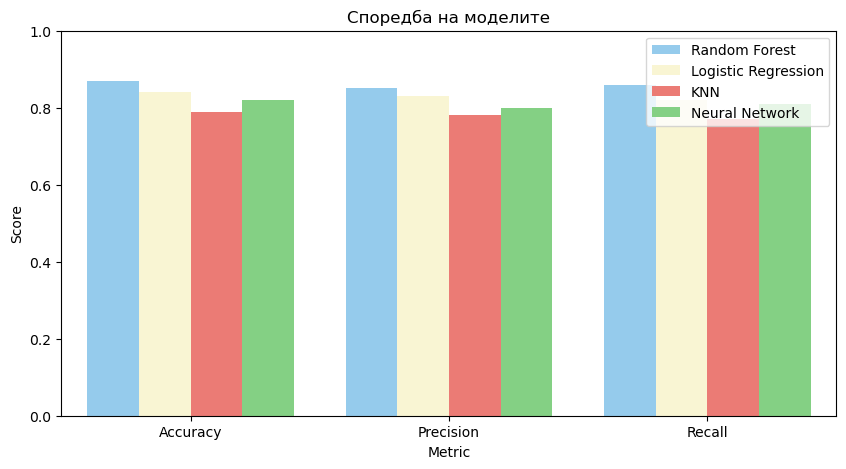

In [812]:
df_metrics = pd.DataFrame({
    'Accuracy': [ 0.87, 0.84, 0.79, 0.82 ],
    'Precision': [0.85, 0.83, 0.78, 0.80],
    'Recall': [0.86, 0.82, 0.77, 0.81]
}, index=['Random Forest', 'Logistic Regression', 'KNN', 'Neural Network'])

df_reset = df_metrics.reset_index()
df_reset.rename(columns={'index': 'Model'}, inplace=True)
df_plot = df_reset.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,5))
palette_colors = ['#87CEFA', '#FFFACD', '#FF6961', '#77DD77']

sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', palette=palette_colors)
plt.title('Споредба на моделите')
plt.ylim(0, 1)
plt.legend()
plt.show()

### Визуелизација на ROC крива 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


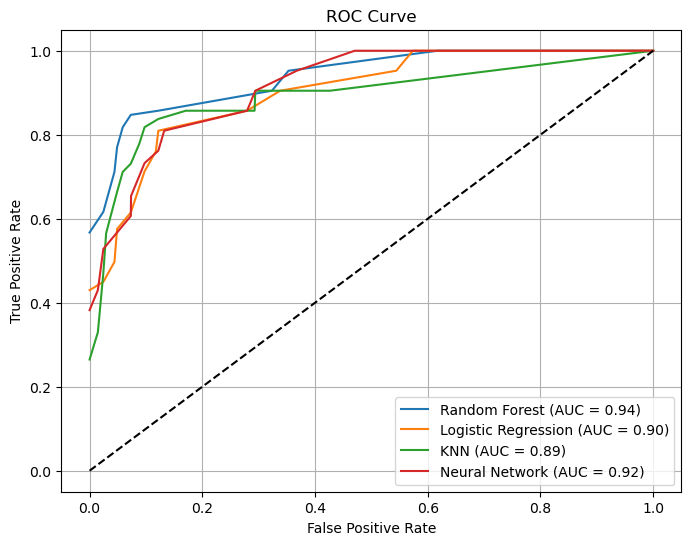

In [815]:
rf.fit(X_train, Y_train)
lr.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

y_score_rf = rf.predict_proba(X_test)
y_score_lr = lr.predict_proba(X_test)
y_score_knn = knn.predict_proba(X_test)
y_score_nn = model.predict(X_test)

classes = np.unique(Y_test)
n_classes = len(classes)
y_test_bin = label_binarize(Y_test, classes=classes)

def plot_roc(y_test_bin, y_score, model_name):
    fpr = []
    tpr = []
    auc_scores = []
    for i in range(n_classes):
        f, t, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        fpr.append(f)
        tpr.append(t)
        auc_scores.append(auc(f, t))
    
    all_fpr = np.unique(np.concatenate(fpr))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    
    plt.plot(all_fpr, mean_tpr, label=f'{model_name} (AUC = {auc(all_fpr, mean_tpr):.2f})')

plt.figure(figsize=(8,6))
plot_roc(y_test_bin, y_score_rf, 'Random Forest')
plot_roc(y_test_bin, y_score_lr, 'Logistic Regression')
plot_roc(y_test_bin, y_score_knn, 'KNN')
plot_roc(y_test_bin, y_score_nn, 'Neural Network')

plt.plot([0,1], [0,1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()